# Python predictive Analysis

### Import Packages

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mpl
import csv

import timeit
import time 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale


### Read Data and Set up Data

In [56]:
train_set = pd.read_csv('train.csv', header = 0)

In [ ]:
y = train_set['label']
x = train_set.copy().drop('label', axis=1)
x_scaled = scale(x)

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.3, random_state=123)

### K-Nearest Neighbors Clustering

In [58]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
#Best Model
KNN = KNeighborsClassifier(n_neighbors = 5)
KNN.fit(x_train,y_train)

#KNN1 = KNeighborsClassifier(n_neighbors = 3)
#KNN1.fit(x_train,y_train)

#KNN2 = KNeighborsClassifier(n_neighbors = 7)
#KNN2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [22]:
# Best Model
KNN_pred = KNN.predict(x_test)

#KNN_pred1 = KNN1.predict(x_test)
#KNN_pred2 = KNN2.predict(x_test)

In [30]:
KNNAS1 = accuracy_score(y_test, KNN_pred, normalize=True)

#KNNAS2 = accuracy_score(y_test, KNN_pred1, normalize=True)
#KNNAS3 = accuracy_score(y_test, KNN_pred2, normalize=True)
print(KNNAS1, KNNAS2, KNNAS3)

0.935952380952381 0.9357142857142857 0.9335714285714286


In [48]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, KNN_pred)

array([[1211,    0,    4,    0,    0,    3,    9,    1,    1,    0],
       [   0, 1396,    6,    1,    1,    0,    3,    1,    3,    1],
       [  12,   18, 1139,   27,    6,    2,   14,   11,    9,    7],
       [   1,    2,   15, 1201,    1,   17,    1,   10,   14,    6],
       [   0,   16,    5,    1, 1133,    2,    5,    7,    2,   40],
       [   8,    6,    5,   38,    4, 1092,   20,    1,    7,    8],
       [  17,    4,   11,    1,    1,   12, 1225,    0,    0,    0],
       [   3,   14,    8,    5,   14,    0,    0, 1202,    2,   50],
       [  12,   22,   10,   35,    7,   52,    6,    6, 1072,   15],
       [   6,    2,    6,   16,   31,    2,    0,   52,    3, 1122]],
      dtype=int64)

### Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn.datasets import make_classification

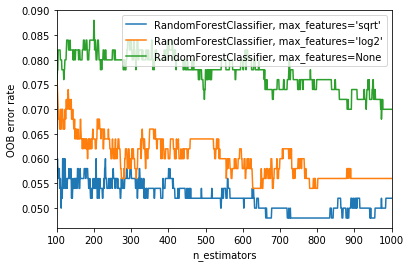

In [37]:
# Generate a binary classification dataset.
X, y = make_classification(n_samples=500, n_features=25,
                           n_clusters_per_class=1, n_informative=15,
                           random_state=123)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=123)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=123)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(n_estimators=100,
                               warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=123))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 100
max_estimators = 1000

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    mpl.plot(xs, ys, label=label)

mpl.xlim(min_estimators, max_estimators)
mpl.xlabel("n_estimators")
mpl.ylabel("OOB error rate")
mpl.legend(loc="upper right")
mpl.show()

In [59]:
#RF = RandomForestClassifier(n_estimators=100)
#RF.fit(x_train,y_train)

#RF1 = RandomForestClassifier(n_estimators=1000)
#RF1.fit(x_train,y_train)

#Best Model
RF2 = RandomForestClassifier(n_estimators=800)
RF2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
#RF_pred = RF.predict(x_test)
#RF_pred1 = RF1.predict(x_test)
RF_pred2 = RF2.predict(x_test)

In [61]:
RFAS1 = accuracy_score(y_test, RF_pred, normalize=True)
RFAS2 = accuracy_score(y_test, RF_pred1, normalize=True)
RFAS3 = accuracy_score(y_test, RF_pred2, normalize=True)
print(RFAS1, RFAS2, RFAS3)

0.9646825396825397 0.9672222222222222 0.9674603174603175


In [62]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, RF_pred2)

array([[1213,    0,    1,    1,    1,    2,    5,    1,    5,    0],
       [   0, 1388,   10,    6,    2,    1,    1,    0,    2,    2],
       [   2,    4, 1197,   13,    3,    1,    5,    7,   10,    3],
       [   1,    0,   16, 1207,    0,   14,    1,   11,   11,    7],
       [   0,    2,    1,    0, 1188,    0,    4,    1,    4,   11],
       [   3,    2,    4,   24,    2, 1136,    9,    0,    7,    2],
       [   1,    1,    0,    0,    1,    7, 1260,    0,    1,    0],
       [   1,    4,   18,    0,    7,    0,    0, 1257,    1,   10],
       [   3,    7,    5,   12,    4,    7,    5,    0, 1177,   17],
       [   9,    0,    3,   19,   19,    4,    2,    9,    8, 1167]],
      dtype=int64)

### Applying Random Forest Model

In [50]:
test_set = pd.read_csv('test.csv', header = 0)

In [52]:
RF_PREDICTION = RF2.predict(test_set)

In [54]:
print(RF_PREDICTION)

[2 0 8 ... 8 8 8]
